In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mem = pd.read_csv("http://raw.githubusercontent.com/haram4th/ablearn/main/member.csv")
tran = pd.read_csv("http://raw.githubusercontent.com/haram4th/ablearn/main/transaction.csv")

In [3]:
mem.head()

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0


In [4]:
tran.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


In [5]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [6]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [7]:
mem.describe()

,id,recency,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000
mean,550694.137797,5.763734,0.502250,0.146781
std,259105.689773,3.507592,0.499999,0.353890
min,100001.000000,1.000000,0.000000,0.000000
25%,326772.000000,2.000000,0.000000,0.000000
50%,551300.000000,6.000000,1.000000,0.000000
75%,774914.500000,9.000000,1.000000,0.000000
max,999997.000000,12.000000,1.000000,1.000000


In [8]:
tran.describe()

,id,num_item,total_amount
count,196836.000000,196836.000000,196836.000000
mean,550557.552932,3.078365,21837.102969
std,259254.795613,1.478408,8218.005565
min,100001.000000,1.000000,8000.000000
25%,326719.000000,2.000000,15000.000000
50%,550918.000000,3.000000,22000.000000
75%,774916.000000,4.000000,29000.000000
max,999997.000000,6.000000,38000.000000


In [9]:
mem['zip_code'].value_counts()

zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64

In [10]:
mem['is_referral'].value_counts()

is_referral
1    32144
0    31856
Name: count, dtype: int64

In [11]:
mem['channel'].value_counts()

channel
Web             28217
Phone           28021
Multichannel     7762
Name: count, dtype: int64

In [12]:
mem['conversion'].value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [13]:
9394 / (9394 + 54606) * 100

14.678125

In [14]:
mem.groupby('recency')['conversion'].value_counts(sort = False)

recency  conversion
1        0             7224
         1             1728
2        0             6197
         1             1340
3        0             4922
         1              982
4        0             4321
         1              756
5        0             3868
         1              642
6        0             3957
         1              648
7        0             3532
         1              546
8        0             3048
         1              447
9        0             5707
         1              734
10       0             6713
         1              852
11       0             3081
         1              423
12       0             2036
         1              296
Name: count, dtype: int64

In [15]:
mem.groupby('recency')['conversion'].describe()

,count,mean,std,min,25%,50%,75%,max
recency,,,,,,,,
1,8952.0,0.193029,0.394698,0.0,0.0,0.0,0.0,1.0
2,7537.0,0.177790,0.382361,0.0,0.0,0.0,0.0,1.0
3,5904.0,0.166328,0.372406,0.0,0.0,0.0,0.0,1.0
4,5077.0,0.148907,0.356032,0.0,0.0,0.0,0.0,1.0
5,4510.0,0.142350,0.349448,0.0,0.0,0.0,0.0,1.0
6,4605.0,0.140717,0.347767,0.0,0.0,0.0,0.0,1.0
7,4078.0,0.133889,0.340575,0.0,0.0,0.0,0.0,1.0
8,3495.0,0.127897,0.334023,0.0,0.0,0.0,0.0,1.0
9,6441.0,0.113957,0.317784,0.0,0.0,0.0,0.0,1.0


recency가 짧을수록 프로모션 성공률이 높다

In [16]:
mem.groupby('is_referral')['conversion'].value_counts(sort = False)

is_referral  conversion
0            0             26343
             1              5513
1            0             28263
             1              3881
Name: count, dtype: int64

In [17]:
mem.groupby('is_referral')['conversion'].describe()

,count,mean,std,min,25%,50%,75%,max
is_referral,,,,,,,,
0,31856.0,0.173060,0.378305,0.0,0.0,0.0,0.0,1.0
1,32144.0,0.120738,0.325828,0.0,0.0,0.0,0.0,1.0


In [18]:
mem.groupby('channel')['conversion'].value_counts(sort = False)

channel       conversion
Multichannel  0              6429
              1              1333
Phone         0             24458
              1              3563
Web           0             23719
              1              4498
Name: count, dtype: int64

In [19]:
mem.groupby('channel')['conversion'].describe()

,count,mean,std,min,25%,50%,75%,max
channel,,,,,,,,
Multichannel,7762.0,0.171734,0.377173,0.0,0.0,0.0,0.0,1.0
Phone,28021.0,0.127155,0.333152,0.0,0.0,0.0,0.0,1.0
Web,28217.0,0.159407,0.366062,0.0,0.0,0.0,0.0,1.0


In [20]:
tran.groupby('id')[['num_item', 'total_amount']].sum()

,num_item,total_amount
id,,
100001,7,52000
100008,5,26000
100032,8,62000
100036,15,129000
100070,13,85000
...,...,...
999932,5,32000
999981,8,91000
999990,9,84000


In [21]:
tran_total = tran.groupby('id')[['num_item', 'total_amount']].sum()
tran_total

,num_item,total_amount
id,,
100001,7,52000
100008,5,26000
100032,8,62000
100036,15,129000
100070,13,85000
...,...,...
999932,5,32000
999981,8,91000
999990,9,84000


In [22]:
tran_total['mean_amount'] = tran_total['total_amount'] / tran_total['num_item']
tran_total

,num_item,total_amount,mean_amount
id,,,
100001,7,52000,7428.571429
100008,5,26000,5200.000000
100032,8,62000,7750.000000
100036,15,129000,8600.000000
100070,13,85000,6538.461538
...,...,...,...
999932,5,32000,6400.000000
999981,8,91000,11375.000000
999990,9,84000,9333.333333


In [23]:
frequency = tran['id'].value_counts(sort=False)

In [24]:
tran_total['frequency'] = frequency

In [25]:
mem = mem.set_index('id')

In [26]:
data = mem.join(tran_total)

In [27]:
data.head()

,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,mean_amount,frequency
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,10,94000,9400.000000,3
184478,6,Rural,1,Web,0,4,29000,7250.000000,1
394235,7,Surburban,1,Web,0,8,41000,5125.000000,2
130152,9,Rural,1,Web,0,7,83000,11857.142857,4
940352,2,Urban,0,Web,0,3,31000,10333.333333,1


In [28]:
data.groupby('num_item')['conversion'].describe()

,count,mean,std,min,25%,50%,75%,max
num_item,,,,,,,,
1,2167.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,2649.0,0.024160,0.153575,0.0,0.0,0.0,0.0,1.0
3,3366.0,0.041295,0.199002,0.0,0.0,0.0,0.0,1.0
4,3924.0,0.065749,0.247875,0.0,0.0,0.0,0.0,1.0
5,4889.0,0.070157,0.255438,0.0,0.0,0.0,0.0,1.0
6,3746.0,0.122264,0.327634,0.0,0.0,0.0,0.0,1.0
7,4062.0,0.151649,0.358725,0.0,0.0,0.0,0.0,1.0
8,4329.0,0.151305,0.358387,0.0,0.0,0.0,0.0,1.0
9,4217.0,0.147972,0.355115,0.0,0.0,0.0,0.0,1.0


구매갯수가 22개 이상인 사람들이 프로모션에 응할 가능성이 높다

In [29]:
data.groupby('conversion')['total_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,54606.0,64648.903051,33453.777907,8000.0,35000.0,63000.0,91000.0,165000.0
1,9394.0,81766.020864,30989.933757,18000.0,57000.0,80000.0,105000.0,184000.0


프로모션에 응한 사람들은 대체로 더 많은 비용을 지불함.

In [30]:
data.groupby('conversion')['mean_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,54606.0,8228.012969,4535.686684,1600.000000,5600.000000,7181.818182,9416.666667,35000.0
1,9394.0,7404.095686,3231.199596,1727.272727,5376.488095,6733.333333,8571.428571,33000.0


답 없음

In [31]:
data.groupby('frequency')['conversion'].describe()

,count,mean,std,min,25%,50%,75%,max
frequency,,,,,,,,
1,10809.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,13356.0,0.177972,0.382504,0.0,0.0,0.0,0.0,1.0
3,13320.0,0.181532,0.385472,0.0,0.0,0.0,0.0,1.0
4,13220.0,0.171331,0.376812,0.0,0.0,0.0,0.0,1.0
5,13295.0,0.175555,0.380455,0.0,0.0,0.0,0.0,1.0


한 번 들어온 사람은 프로모션에 응하지 않음

In [32]:
data.columns

Index(['recency', 'zip_code', 'is_referral', 'channel', 'conversion',
       'num_item', 'total_amount', 'mean_amount', 'frequency'],
      dtype='object')

In [33]:
data_corr = data[['recency', 'is_referral', 'conversion',
       'num_item', 'total_amount', 'mean_amount', 'frequency']].corr()
data_corr

,recency,is_referral,conversion,num_item,total_amount,mean_amount,frequency
recency,1.000000,-0.052106,-0.074765,-0.013583,-0.009510,0.001776,-0.006332
is_referral,-0.052106,1.000000,-0.073924,-0.013603,-0.008578,0.008677,-0.003406
conversion,-0.074765,-0.073924,1.000000,0.221219,0.180001,-0.066595,0.122682
num_item,-0.013583,-0.013603,0.221219,1.000000,0.776646,-0.434974,0.850873
total_amount,-0.009510,-0.008578,0.180001,0.776646,1.000000,0.020333,0.902206
mean_amount,0.001776,0.008677,-0.066595,-0.434974,0.020333,1.000000,-0.159094
frequency,-0.006332,-0.003406,0.122682,0.850873,0.902206,-0.159094,1.000000


<Axes: >

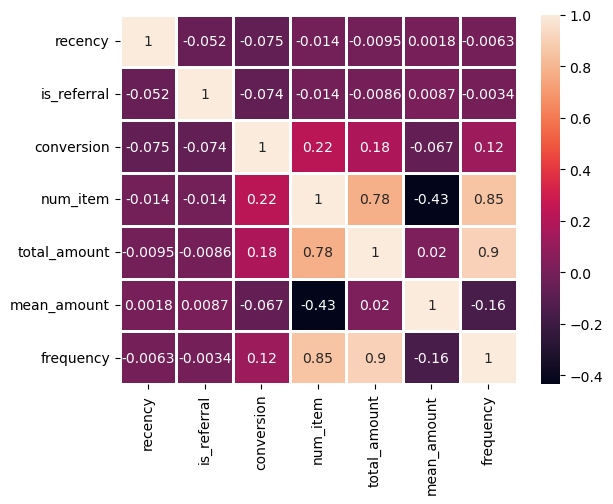

In [34]:
sns.heatmap(data_corr, annot = True, linewidth = 1)

- num_item, total_amount, frequency가 서로 상관관계가 높기 때문에 이들 중 하나만 선택해야 함
- 선택 기준으론 conversion과 가장 상관관계가 높은 것으로 선택
- 그래서 num_item으로 선택

In [35]:
data.groupby('zip_code')['conversion'].value_counts()

zip_code   conversion
Rural      0              7764
           1              1799
Surburban  0             24749
           1              4027
Urban      0             22093
           1              3568
Name: count, dtype: int64

In [36]:
data.groupby('zip_code')['conversion'].describe()

,count,mean,std,min,25%,50%,75%,max
zip_code,,,,,,,,
Rural,9563.0,0.188121,0.390829,0.0,0.0,0.0,0.0,1.0
Surburban,28776.0,0.139943,0.346934,0.0,0.0,0.0,0.0,1.0
Urban,25661.0,0.139044,0.345999,0.0,0.0,0.0,0.0,1.0


시골이 프로모션 참여율이 높다

In [37]:
data = data.drop(['total_amount', 'frequency'], axis = 1)
data

,recency,zip_code,is_referral,channel,conversion,num_item,mean_amount
id,,,,,,,
906145,10,Surburban,0,Phone,0,10,9400.000000
184478,6,Rural,1,Web,0,4,7250.000000
394235,7,Surburban,1,Web,0,8,5125.000000
130152,9,Rural,1,Web,0,7,11857.142857
940352,2,Urban,0,Web,0,3,10333.333333
...,...,...,...,...,...,...,...
838295,10,Urban,0,Web,0,14,7428.571429
547316,5,Urban,1,Phone,0,9,9888.888889
131575,6,Urban,1,Phone,0,8,7625.000000


In [38]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,recency,is_referral,conversion,num_item,mean_amount,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
id,,,,,,,,,
906145,10,0,0,10,9400.000000,True,False,True,False
184478,6,1,0,4,7250.000000,False,False,False,True
394235,7,1,0,8,5125.000000,True,False,False,True
130152,9,1,0,7,11857.142857,False,False,False,True
940352,2,0,0,3,10333.333333,False,True,False,True


# 독립 변수들 간에 단위 차이가 너무 클 때 스케일링 필요
- min-max 스케일러 : 모든 숫자를 0과 1사이의 숫자로 변환 -> 데이터 분포의 모양을 그대로 유지
- standard 스케일러 : 평균을 0, 표준편차를 1로 하는 정규분포의 형태로 변환 -> 데이터 분포 모양이 정규 분포로 바뀜
- robust 스케일러 : 사분위스를 이용해서 데이터를 스케일링 -> 데이터에 이상값이 있을 때 영향을 받지 않음.
- 이상값이 있다면 min-max나 standard는 사용 x

In [39]:
X = data.drop('conversion', axis = 1)
y = data['conversion']

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
ss = StandardScaler()
std_X = ss.fit_transform(X)
std_X

array([[ 1.20775141, -1.00451017,  0.10566371, ..., -0.81811885,
         1.1331378 , -0.88800834],
       [ 0.06735889,  0.99551008, -1.08536763, ..., -0.81811885,
        -0.8825052 ,  1.12611555],
       [ 0.35245702,  0.99551008, -0.29134674, ..., -0.81811885,
        -0.8825052 ,  1.12611555],
       ...,
       [ 0.06735889,  0.99551008, -0.29134674, ...,  1.2223163 ,
         1.1331378 , -0.88800834],
       [-1.35813177,  0.99551008,  1.29669505, ..., -0.81811885,
        -0.8825052 , -0.88800834],
       [-1.35813177, -1.00451017,  1.49520028, ..., -0.81811885,
        -0.8825052 ,  1.12611555]])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(std_X, y, test_size = 0.4, stratify = y, random_state = 100)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size = 0.5, stratify = y_valid, random_state = 100)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [45]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = 10)
knn.fit(X_train, y_train)
pred = knn.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))
print("="*30, 'test', "="*30)
pred = knn.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.835703125
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10921
           1       0.31      0.09      0.14      1879

    accuracy                           0.84     12800
   macro avg       0.58      0.53      0.53     12800
weighted avg       0.78      0.84      0.80     12800

============================== test ==============================
0.83578125
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10921
           1       0.32      0.10      0.15      1879

    accuracy                           0.84     12800
   macro avg       0.59      0.53      0.53     12800
weighted avg       0.78      0.84      0.80     12800



In [46]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [47]:
# 정밀도(예측값 중에서 true로 맞춘 값)
190 / (190 + 413) * 100

31.509121061359867

In [48]:
# 민감도(실제값 중에서 true로 맞춘 값)
190 / (190 + 1689) * 100

10.111761575306014

In [50]:
# f1 score
(2 * 31 * 10) / (31 + 10)

15.121951219512194

### ROC 커브

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
print(roc_auc_score(y_test, pred))

0.5316502830161693


## svm 실습

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [82]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [83]:
pred = clf.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.853515625
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     10921
           1       0.75      0.00      0.01      1879

    accuracy                           0.85     12800
   macro avg       0.80      0.50      0.46     12800
weighted avg       0.84      0.85      0.79     12800



## 클래스 불균형 해소를 위한 데이터 증폭/축소

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
smt = SMOTE(sampling_strategy = 'auto', random_state = 7, k_neighbors = 5, n_jobs = 10)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

C:\Users\5-08\miniforge3\envs\fintech\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [56]:
y_train_smt.value_counts()

conversion
0    32764
1    32764
Name: count, dtype: int64

### 증폭한 걸로 배깅

In [86]:
from sklearn.ensemble import BaggingClassifier

In [95]:
bcf = BaggingClassifier(n_estimators = 1000, n_jobs = 10, random_state = 7)
bcf.fit(X_train_smt, y_train_smt)
pred = bcf.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.783359375
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     10921
           1       0.24      0.23      0.23      1879

    accuracy                           0.78     12800
   macro avg       0.56      0.55      0.55     12800
weighted avg       0.78      0.78      0.78     12800



### 증폭한 걸로 xgboost

In [89]:
from xgboost import XGBClassifier

In [96]:
for i in range(1, 20) :
    xg = XGBClassifier(n_estimators = 1000, max_depth = i, random_state = 7, n_jobs = 10, learning_rate = 0.1)
    xg.fit(X_train, y_train)
    pred = xg.predict(X_valid)
    print(i, accuracy_score(y_valid, pred))
    print(i, classification_report(y_valid, pred))

1 0.856953125
1               precision    recall  f1-score   support

           0       0.86      1.00      0.92     10921
           1       0.74      0.04      0.07      1879

    accuracy                           0.86     12800
   macro avg       0.80      0.52      0.50     12800
weighted avg       0.84      0.86      0.80     12800

2 0.85703125
2               precision    recall  f1-score   support

           0       0.86      1.00      0.92     10921
           1       0.66      0.05      0.10      1879

    accuracy                           0.86     12800
   macro avg       0.76      0.52      0.51     12800
weighted avg       0.83      0.86      0.80     12800

3 0.85609375
3               precision    recall  f1-score   support

           0       0.86      0.99      0.92     10921
           1       0.59      0.06      0.11      1879

    accuracy                           0.86     12800
   macro avg       0.73      0.53      0.52     12800
weighted avg       0.82     

In [99]:
for i in range(1, 10) : 
    xg = XGBClassifier(n_estimators = 1000, max_depth = i, random_state = 7, n_jobs = 10, learning_rate = 0.1)
    xg.fit(X_train_smt, y_train_smt)
    pred = xg.predict(X_valid)
    print(i, accuracy_score(y_valid, pred))
    print(i, classification_report(y_valid, pred))

1 0.634375
1               precision    recall  f1-score   support

           0       0.91      0.64      0.75     10921
           1       0.23      0.62      0.33      1879

    accuracy                           0.63     12800
   macro avg       0.57      0.63      0.54     12800
weighted avg       0.81      0.63      0.69     12800

2 0.824453125
2               precision    recall  f1-score   support

           0       0.88      0.93      0.90     10921
           1       0.35      0.24      0.28      1879

    accuracy                           0.82     12800
   macro avg       0.61      0.58      0.59     12800
weighted avg       0.80      0.82      0.81     12800

3 0.82609375
3               precision    recall  f1-score   support

           0       0.87      0.93      0.90     10921
           1       0.35      0.21      0.26      1879

    accuracy                           0.83     12800
   macro avg       0.61      0.57      0.58     12800
weighted avg       0.80      0

In [102]:
xg = XGBClassifier(n_estimators = 1000, max_depth = 2, random_state = 7, n_jobs = 10, learning_rate = 0.1)
xg.fit(X_train_smt, y_train_smt)
pred = xg.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.824453125
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10921
           1       0.35      0.24      0.28      1879

    accuracy                           0.82     12800
   macro avg       0.61      0.58      0.59     12800
weighted avg       0.80      0.82      0.81     12800



In [103]:
pred = xg.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.82640625
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10921
           1       0.36      0.24      0.29      1879

    accuracy                           0.83     12800
   macro avg       0.62      0.58      0.59     12800
weighted avg       0.80      0.83      0.81     12800



### 증폭한 걸로 lightGBM 돌리기

In [100]:
from lightgbm import LGBMClassifier

In [104]:
for i in range(1, 10) :
    lgb = LGBMClassifier(n_estimators = 1000, max_depth = i, random_state = 7, n_jobs = 10, learning_rate = 0.1, verbose = -1)
    lgb.fit(X_train_smt, y_train_smt)
    pred = lgb.predict(X_valid)
    print(i, accuracy_score(y_valid, pred))
    print(i, classification_report(y_valid, pred))

1 0.63640625
1               precision    recall  f1-score   support

           0       0.91      0.64      0.75     10921
           1       0.23      0.61      0.33      1879

    accuracy                           0.64     12800
   macro avg       0.57      0.63      0.54     12800
weighted avg       0.81      0.64      0.69     12800

2 0.843984375
2               precision    recall  f1-score   support

           0       0.87      0.96      0.91     10921
           1       0.42      0.18      0.25      1879

    accuracy                           0.84     12800
   macro avg       0.65      0.57      0.58     12800
weighted avg       0.81      0.84      0.82     12800

3 0.840625
3               precision    recall  f1-score   support

           0       0.87      0.96      0.91     10921
           1       0.39      0.16      0.22      1879

    accuracy                           0.84     12800
   macro avg       0.63      0.56      0.57     12800
weighted avg       0.80      0

In [106]:
lgb = LGBMClassifier(n_estimators = 1000, max_depth = 2, random_state = 7, n_jobs = 10, learning_rate = 0.1, verbose = -1)
lgb.fit(X_train_smt, y_train_smt)
pred = lgb.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.843984375
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10921
           1       0.42      0.18      0.25      1879

    accuracy                           0.84     12800
   macro avg       0.65      0.57      0.58     12800
weighted avg       0.81      0.84      0.82     12800



In [107]:
pred = lgb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.842265625
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10921
           1       0.41      0.18      0.25      1879

    accuracy                           0.84     12800
   macro avg       0.64      0.57      0.58     12800
weighted avg       0.80      0.84      0.81     12800



### 랜덤서치를 이용한 svc 하이퍼 파라미터 튜닝

In [54]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [118]:
clf = SVC()
svc_para = dict(C = [0.5, 1, 1.5, 2], gamma=['auto', 'scale'], kernel = ['linear', 'poly', 'rbf', 'sigmoid'], degree = [3,4])

In [119]:
svc_para

{'C': [0.5, 1, 1.5, 2],
 'gamma': ['auto', 'scale'],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'degree': [3, 4]}

In [120]:
svc_cv = RandomizedSearchCV(clf, param_distributions = svc_para, n_iter = 100, n_jobs = 10, verbose = 3, random_state = 7)
svc_cv.fit(X_train, y_train)
pred = svc_cv.predict(X_valid)
print(sorted(svc_cv.cv_results_.keys()))
print('최적 하이퍼파라미터 : ', svc_cv.best_params_)
print(f"최고 예측 정확도 : {svc_cv.best_score_:.4f}")

C:\Users\5-08\miniforge3\envs\fintech\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 64 candidates, totalling 320 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_degree', 'param_gamma', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼파라미터 :  {'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'C': 2}
최고 예측 정확도 : 0.8539


In [ ]:
svc = SVC(C = 2, kernel = 'rbf', degree = 3, gamma = 'auto', random_state = 100)
svc.fit(X_train, y_train)
pred = svc.predict(X_valid)
print(accur(y_valid, pred))
print(classification_report(y_valid, pred))

In [66]:
svc = SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma = 'scale', probability = True, random_state = 100)
svc.fit(X_train_smt, y_train_smt)
pred = svc.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

NameError: name 'accur' is not defined

In [67]:
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.57296875
              precision    recall  f1-score   support

           0       0.92      0.54      0.68     10921
           1       0.22      0.74      0.34      1879

    accuracy                           0.57     12800
   macro avg       0.57      0.64      0.51     12800
weighted avg       0.82      0.57      0.63     12800



### 다른 방식의 스케일링

In [60]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [61]:
mm = MinMaxScaler()
mm_X = mm.fit_transform(X)
rb = RobustScaler()
rb_X = rb.fit_transform(X)

In [62]:
X_mm_scaled = pd.DataFrame(mm_X, columns = X.columns)
X_mm_scaled

,recency,is_referral,num_item,mean_amount,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,0.818182,0.0,0.333333,0.233533,1.0,0.0,1.0,0.0
1,0.454545,1.0,0.111111,0.169162,0.0,0.0,0.0,1.0
2,0.545455,1.0,0.259259,0.105539,1.0,0.0,0.0,1.0
3,0.727273,1.0,0.222222,0.307100,0.0,0.0,0.0,1.0
4,0.090909,0.0,0.074074,0.261477,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
63995,0.818182,0.0,0.481481,0.174508,0.0,1.0,0.0,1.0
63996,0.363636,1.0,0.296296,0.248170,0.0,1.0,1.0,0.0
63997,0.454545,1.0,0.259259,0.180389,0.0,1.0,1.0,0.0
63998,0.000000,1.0,0.555556,0.154192,1.0,0.0,0.0,0.0


In [63]:
X_rb_scaled = pd.DataFrame(rb_X, columns = X.columns)
X_rb_scaled

,recency,is_referral,num_item,mean_amount,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,0.571429,-1.0,0.125,0.616625,1.0,0.0,1.0,0.0
1,0.000000,0.0,-0.625,0.037417,0.0,0.0,0.0,1.0
2,0.142857,0.0,-0.125,-0.535057,1.0,0.0,0.0,1.0
3,0.428571,0.0,-0.250,1.278577,0.0,0.0,0.0,1.0
4,-0.571429,-1.0,-0.750,0.868064,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
63995,0.571429,-1.0,0.625,0.085524,0.0,1.0,0.0,1.0
63996,-0.142857,0.0,0.000,0.748331,0.0,1.0,1.0,0.0
63997,0.000000,0.0,-0.125,0.138441,0.0,1.0,1.0,0.0
63998,-0.714286,0.0,0.875,-0.097283,1.0,0.0,0.0,0.0


In [64]:
X_train_mm, X_valid_mm, y_train_mm, y_valid_mm = train_test_split(X_mm_scaled, y, test_size = 0.4, random_state = 100)
X_valid_mm, X_test_mm, y_valid_mm, y_test_mm = train_test_split(X_valid_mm, y_valid_mm, test_size = 0.5, random_state = 100)

In [65]:
X_train_rb, X_valid_rb, y_train_rb, y_valid_rb = train_test_split(X_rb_scaled, y, test_size = 0.4, random_state = 100)
X_valid_rb, X_test_rb, y_valid_rb, y_test_rb = train_test_split(X_valid_rb, y_valid_rb, test_size = 0.5, random_state = 100)

In [ ]:
svc = SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma = 'scale', probability = True, random_state = 100)
svc.fit(X_train_mm, y_train_mm)
pred_mm = svc.predict(X_valid_mm)
print(accuracy_scoreuracy_score(y_valid_mm, pred_mm))
print(classification_report(y_valid_mm, pred_mm))
print(roc_auc_score(y_valid_mm, pred_mm))

In [ ]:
svc = SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma = 'scale', probability = True, random_state = 100)
svc.fit(X_train_rb, y_train_rb)
pred_rb = svc.predict(X_valid_rb)
print(accuracy_scoreuracy_score(y_valid_rb, pred_rb))
print(classification_report(y_valid_rb, pred_rb))
print(roc_auc_score(y_valid_rb, pred_rb))

In [71]:
from imblearn.over_sampling import SMOTENC

In [73]:
kms = SMOTENC(categorical_features = ['zip_code_Surburban','zip_code_Urban', 'channel_Phone', 'channel_Web'], sampling_strategy = 'auto', random_state = 777, k_neighbors = 5, n_jobs = 10)
X_train_mm_kms, y_train_mm_kms = kms.fit_resample(X_train_mm, y_train_mm)
print(len(X_train_mm_kms), len(y_train_mm_kms))

C:\Users\5-08\miniforge3\envs\fintech\lib\site-packages\imblearn\over_sampling\_smote\base.py:645: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


65398 65398


In [74]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = 10)
knn.fit(X_train_mm_kms, y_train_mm_kms)
pred = knn.predict(X_valid_mm)
print(accuracy_score(y_valid_mm, pred))
print(classification_report(y_valid_mm, pred))
print("="*30, 'test', "="*30)
pred = knn.predict(X_test_mm)
print(accuracy_score(y_test_mm, pred))
print(classification_report(y_test_mm, pred))

0.663828125
              precision    recall  f1-score   support

           0       0.89      0.70      0.78     10956
           1       0.21      0.48      0.29      1844

    accuracy                           0.66     12800
   macro avg       0.55      0.59      0.53     12800
weighted avg       0.79      0.66      0.71     12800

============================== test ==============================
0.66921875
              precision    recall  f1-score   support

           0       0.88      0.71      0.78     10951
           1       0.21      0.46      0.28      1849

    accuracy                           0.67     12800
   macro avg       0.55      0.58      0.53     12800
weighted avg       0.79      0.67      0.71     12800



In [77]:
pred_mm_kms = svc.predict(X_test)
print(accuracy_score(y_test, pred_mm_kms))
print(classification_report(y_test, pred_mm_kms))
print(roc_auc_score(y_test, pred_mm_kms))

0.574921875
              precision    recall  f1-score   support

           0       0.93      0.54      0.69     10921
           1       0.22      0.76      0.34      1879

    accuracy                           0.57     12800
   macro avg       0.58      0.65      0.51     12800
weighted avg       0.82      0.57      0.64     12800

0.6499882142586857


In [82]:
knn_params = dict(n_neighbors = [3,5,7,10], weights = ['uniform', 'distance'],
                 algorithm = ['auto', 'ball_tree', 'kd_tree', 'burte'], leaf_size = [30,50,70,100],
                 metric = ['minkowski, euclidean', 'manhattan'], n_jobs = [10])

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
rand_cv = RandomizedSearchCV(knn, param_distributions=knn_params, n_iter = 30, n_jobs = 10, refit = True, cv = 3, random_state = 100)
rand_cv.fit(X_train_mm_kms, y_train_mm_kms)
pred_mm = rand_cv.predict(X_valid_mm)
print('best_params : ', rand_cv.best_params_)
print(f"최고 예측 정확도 : {rand_cv.best_score_:.4f}")

C:\Users\5-08\miniforge3\envs\fintech\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
66 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\5-08\miniforge3\envs\fintech\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\5-08\miniforge3\envs\fintech\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\5-08\miniforge3\envs\fintech\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(

best_params :  {'weights': 'distance', 'n_neighbors': 3, 'n_jobs': 10, 'metric': 'manhattan', 'leaf_size': 70, 'algorithm': 'auto'}
최고 예측 정확도 : 0.7999


In [90]:
knn = KNeighborsClassifier(n_neighbors = 3, n_jobs = 10, weights = 'distance', metric = 'manhattan', leaf_size = 70, algorithm = 'auto')
knn.fit(X_train_mm_kms, y_train_mm_kms)
pred = knn.predict(X_valid_mm)
print(accuracy_score(y_valid_mm, pred))
print(classification_report(y_valid_mm, pred))

0.73078125
              precision    recall  f1-score   support

           0       0.87      0.80      0.84     10956
           1       0.21      0.32      0.26      1844

    accuracy                           0.73     12800
   macro avg       0.54      0.56      0.55     12800
weighted avg       0.78      0.73      0.75     12800



In [91]:
pred = knn.predict(X_test_mm)
print(accuracy_score(y_test_mm, pred))
print(classification_report(y_test_mm, pred))

0.73421875
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     10951
           1       0.21      0.31      0.25      1849

    accuracy                           0.73     12800
   macro avg       0.54      0.56      0.54     12800
weighted avg       0.78      0.73      0.75     12800

